In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("IR Dec25_480min.csv")

In [3]:
df.head()

,Timestamp (UTC),Open,High,Low,Close,IR Dec25: Volume
0,2024-02-07 06:08:00,96.39,96.40,96.35,96.36,1350
1,2024-02-07 14:08:00,96.37,96.40,96.36,96.37,316
2,2024-02-07 21:28:00,96.39,96.40,96.37,96.39,1280
3,2024-02-08 05:28:00,96.38,96.38,96.37,96.38,466
4,2024-02-08 06:08:00,96.37,96.39,96.35,96.36,489


## Data prep

In [5]:
df['rows'] = df.reset_index().index

In [6]:
df['hl'] = df['High'] - df['Low']

In [7]:
df['oc'] = abs(df['Open'] - df['Close'])

In [8]:
df['Timestamp'] = df['rows']

In [9]:
df = df.rename(columns={'Timestamp': 'Rows'})

In [10]:
df['hlc/3'] = (df['High'] + df['Low'] + df['Close'])/3.0

In [11]:
df['hl-oc'] = df['hl']-df['oc']

change Volume column name

In [13]:
df = df.rename(columns={'IR Dec25: Volume': 'Volume'})

In [14]:
df.head()

,Timestamp (UTC),Open,High,Low,Close,Volume,rows,hl,oc,Rows,hlc/3,hl-oc
0,2024-02-07 06:08:00,96.39,96.40,96.35,96.36,1350,0,0.05,0.03,0,96.370000,0.02
1,2024-02-07 14:08:00,96.37,96.40,96.36,96.37,316,1,0.04,0.00,1,96.376667,0.04
2,2024-02-07 21:28:00,96.39,96.40,96.37,96.39,1280,2,0.03,0.00,2,96.386667,0.03
3,2024-02-08 05:28:00,96.38,96.38,96.37,96.38,466,3,0.01,0.00,3,96.376667,0.01
4,2024-02-08 06:08:00,96.37,96.39,96.35,96.36,489,4,0.04,0.01,4,96.366667,0.03


In [15]:
df['hl/vol'] = (df['hl']/df['Volume'])

In [16]:
df.head()

,Timestamp (UTC),Open,High,Low,Close,Volume,rows,hl,oc,Rows,hlc/3,hl-oc,hl/vol
0,2024-02-07 06:08:00,96.39,96.40,96.35,96.36,1350,0,0.05,0.03,0,96.370000,0.02,0.000037
1,2024-02-07 14:08:00,96.37,96.40,96.36,96.37,316,1,0.04,0.00,1,96.376667,0.04,0.000127
2,2024-02-07 21:28:00,96.39,96.40,96.37,96.39,1280,2,0.03,0.00,2,96.386667,0.03,0.000023
3,2024-02-08 05:28:00,96.38,96.38,96.37,96.38,466,3,0.01,0.00,3,96.376667,0.01,0.000021
4,2024-02-08 06:08:00,96.37,96.39,96.35,96.36,489,4,0.04,0.01,4,96.366667,0.03,0.000082


In [17]:
df['hl/vol'] = (df['hl']/df['Volume'])*10**7 #might need to check the data here for multiplier else leave

In [18]:
df = df.drop(['rows'], axis = 1)

## Stats

In [20]:
df.shape

(147, 12)

In [21]:
df.describe()

,Open,High,Low,Close,Volume,hl,oc,Rows,hlc/3,hl-oc,hl/vol
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,96.311565,96.325646,96.297279,96.311633,855.578231,0.028367,0.015714,73.000000,96.311519,0.012653,662.564460
std,0.067263,0.065009,0.069297,0.066714,796.262932,0.022575,0.017712,42.579338,0.066101,0.012998,934.242025
min,96.110000,96.160000,96.110000,96.130000,1.000000,0.000000,0.000000,0.000000,96.143333,0.000000,0.000000
25%,96.270000,96.280000,96.250000,96.270000,176.500000,0.010000,0.000000,36.500000,96.266667,0.000000,180.790314
50%,96.300000,96.320000,96.290000,96.300000,626.000000,0.020000,0.010000,73.000000,96.303333,0.010000,347.977381
75%,96.370000,96.380000,96.355000,96.360000,1372.000000,0.040000,0.020000,109.500000,96.366667,0.020000,775.193798
max,96.440000,96.460000,96.440000,96.450000,3691.000000,0.120000,0.100000,146.000000,96.440000,0.060000,7142.857143


In [22]:
df.describe(percentiles=[.3, .6, .8, .9]) 

,Open,High,Low,Close,Volume,hl,oc,Rows,hlc/3,hl-oc,hl/vol
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,96.311565,96.325646,96.297279,96.311633,855.578231,0.028367,0.015714,73.000000,96.311519,0.012653,662.564460
std,0.067263,0.065009,0.069297,0.066714,796.262932,0.022575,0.017712,42.579338,0.066101,0.012998,934.242025
min,96.110000,96.160000,96.110000,96.130000,1.000000,0.000000,0.000000,0.000000,96.143333,0.000000,0.000000
30%,96.270000,96.280000,96.260000,96.270000,244.600000,0.010000,0.008000,43.800000,96.272667,0.000000,203.088331
50%,96.300000,96.320000,96.290000,96.300000,626.000000,0.020000,0.010000,73.000000,96.303333,0.010000,347.977381
60%,96.330000,96.346000,96.320000,96.330000,874.200000,0.030000,0.010000,87.600000,96.328667,0.010000,448.245799
80%,96.380000,96.390000,96.360000,96.370000,1555.400000,0.040000,0.030000,116.800000,96.376667,0.020000,978.653530
90%,96.400000,96.410000,96.390000,96.394000,1958.000000,0.050000,0.040000,131.400000,96.396667,0.030000,1453.836612
max,96.440000,96.460000,96.440000,96.450000,3691.000000,0.120000,0.100000,146.000000,96.440000,0.060000,7142.857143


# STATES

In [24]:
import pandas as pd
import numpy as np
!pip install kmodes
!pip install kmeans
from kmodes.kmodes import KModes
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [19 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-311
  creating build\lib.win-amd64-cpython-311\kmeans
  copying kmeans\performance.py -> build\lib.win-amd64-cpython-311\kmeans
  copying kmeans\tests.py -> build\lib.win-amd64-cpython-311\kmeans
  copying kmeans\__init__.py -> build\lib.win-amd64-cpython-311\kmeans
  running egg_info
  writing kmeans.egg-info\PKG-INFO
  writing dependency_links to kmeans.egg-info\dependency_links.txt
  writing top-level names to kmeans.egg-info\top_level.txt
  reading manifest file 'kmeans.egg-info\SOURCES.txt'
  writing manifest file 'kmeans.egg-info\SOURCES.txt'
  copying kmeans\lib.c -> build\lib.win-amd64-cpython-311\kmeans
  running build_ext
  building 'kmeans/lib' extension
  error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Mic

  Using cached kmeans-1.0.2.tar.gz (5.9 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for kmeans
Failed to build kmeans


In [25]:
dfs = df

In [26]:
df1 = dfs.fillna('Not Available')

In [27]:
df1=dfs

In [28]:
df1 = df1.set_index(['Rows','Open','High','Low','Close', 'hlc/3','Timestamp (UTC)'])

In [29]:
df1.head()

,,,,,,,Volume,hl,oc,hl-oc,hl/vol
Rows,Open,High,Low,Close,hlc/3,Timestamp (UTC),,,,,
0,96.39,96.40,96.35,96.36,96.370000,2024-02-07 06:08:00,1350,0.05,0.03,0.02,370.370370
1,96.37,96.40,96.36,96.37,96.376667,2024-02-07 14:08:00,316,0.04,0.00,0.04,1265.822785
2,96.39,96.40,96.37,96.39,96.386667,2024-02-07 21:28:00,1280,0.03,0.00,0.03,234.375000
3,96.38,96.38,96.37,96.38,96.376667,2024-02-08 05:28:00,466,0.01,0.00,0.01,214.592275
4,96.37,96.39,96.35,96.36,96.366667,2024-02-08 06:08:00,489,0.04,0.01,0.03,817.995910


In [30]:
df1 = df1.fillna('Not Available')

#### Data cleaning a.p. datasets

In [32]:
#index1 = df1[ (df1['hl-oc'] >= 0.2) ].index
#df1.drop(index1 , inplace=True)
#df1.head(15)

In [33]:
df1.shape

(147, 5)

## K-means clustering

In [35]:
#df1=df1.drop(columns = ['Cluster']) #for using again
X=df1

In [36]:
import warnings
warnings.filterwarnings('ignore')

wcss = []

for i in range(1,15):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

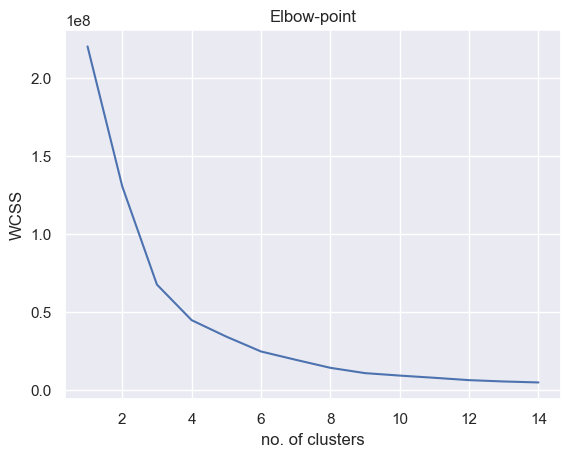

In [37]:
sns.set()
plt.plot(range(1,15),wcss)
plt.title('Elbow-point')
plt.xlabel('no. of clusters')
plt.ylabel('WCSS')
plt.show()

In [38]:
#Building the model with 4 clusters
kmode = KModes(n_clusters=4, init = "random", n_init = 10, verbose=1)
clusters = kmode.fit_predict(df1)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 20, cost: 512.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 32, cost: 526.0
Run 2, iteration: 2/100, moves: 0, cost: 526.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 9, cost: 506.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 46, cost: 494.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 5, cost: 504.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 7, cost: 528.0
Run 6, iteration: 2/100, moves: 0, cost: 528.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 30, cost: 505.0
Init: initial

array([3, 1, 1, 1, 0, 0, 0, 1, 3, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 3, 0, 3, 1, 0, 0, 1, 3, 2, 2, 0, 0, 0, 3, 0, 1, 2, 1, 3, 3,
       3, 0, 1, 0, 0, 0, 1, 0, 1, 3, 0, 1, 0, 1, 0, 0, 1, 3, 1, 1, 0, 1,
       2, 0, 0, 2, 3, 1, 2, 2, 0, 1, 0, 2, 0, 1, 3, 0, 3, 0, 0, 0, 0, 1,
       0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1, 3, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 2, 0, 1, 2, 1, 3, 2, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 2, 2, 0, 0,
       0, 3, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 3, 1, 0], dtype=uint16)

In [39]:
#df1=df1.drop(columns = ['Cluster']) # USE WHEN RESUSING
df1.insert(0, "Cluster", clusters, True)
df1.head()

,,,,,,,Cluster,Volume,hl,oc,hl-oc,hl/vol
Rows,Open,High,Low,Close,hlc/3,Timestamp (UTC),,,,,,
0,96.39,96.40,96.35,96.36,96.370000,2024-02-07 06:08:00,3,1350,0.05,0.03,0.02,370.370370
1,96.37,96.40,96.36,96.37,96.376667,2024-02-07 14:08:00,1,316,0.04,0.00,0.04,1265.822785
2,96.39,96.40,96.37,96.39,96.386667,2024-02-07 21:28:00,1,1280,0.03,0.00,0.03,234.375000
3,96.38,96.38,96.37,96.38,96.376667,2024-02-08 05:28:00,1,466,0.01,0.00,0.01,214.592275
4,96.37,96.39,96.35,96.36,96.366667,2024-02-08 06:08:00,0,489,0.04,0.01,0.03,817.995910


In [40]:
df1.groupby(['Cluster']).size()

Cluster
0    74
1    37
2    17
3    19
dtype: int64

In [41]:
'''
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
'''
# just in case

"\npd.set_option('display.max_rows', None)\npd.set_option('display.max_columns', None)\npd.set_option('display.width', None)\npd.set_option('display.max_colwidth', -1)\n"

In [42]:
df1.loc[(df1['Cluster']==0)] #use 1,2,3.. to view the clusters

,,,,,,,Cluster,Volume,hl,oc,hl-oc,hl/vol
Rows,Open,High,Low,Close,hlc/3,Timestamp (UTC),,,,,,
4,96.37,96.39,96.35,96.36,96.366667,2024-02-08 06:08:00,0,489,0.04,0.01,0.03,817.995910
5,96.36,96.36,96.34,96.34,96.346667,2024-02-08 14:08:00,0,157,0.02,0.02,0.00,1273.885350
6,96.36,96.36,96.32,96.34,96.340000,2024-02-08 21:28:00,0,1077,0.04,0.02,0.02,371.402043
9,96.30,96.30,96.25,96.28,96.276667,2024-02-09 14:08:00,0,505,0.05,0.02,0.03,990.099010
11,96.27,96.28,96.27,96.27,96.273333,2024-02-12 06:08:00,0,105,0.01,0.00,0.01,952.380952
...,...,...,...,...,...,...,...,...,...,...,...,...
140,96.27,96.29,96.25,96.28,96.273333,2024-04-03 14:08:00,0,1503,0.04,0.01,0.03,266.134398
141,96.30,96.31,96.25,96.26,96.273333,2024-04-03 21:28:00,0,663,0.06,0.04,0.02,904.977376
142,96.25,96.26,96.25,96.26,96.256667,2024-04-04 05:28:00,0,495,0.01,0.01,0.00,202.020202


In [43]:
C2=df1.loc[(df1['Cluster']==0)] #use 1,2,3.. to view the clusters

In [44]:
C2.describe()

,Cluster,Volume,hl,oc,hl-oc,hl/vol
count,74.0,74.000000,74.000000,74.000000,74.000000,74.000000
mean,0.0,926.216216,0.030811,0.020270,0.010541,744.216301
std,0.0,872.275975,0.024593,0.020067,0.012485,834.095909
min,0.0,22.000000,0.010000,0.000000,0.000000,83.333333
25%,0.0,193.250000,0.010000,0.010000,0.000000,207.461578
50%,0.0,631.000000,0.025000,0.010000,0.010000,420.957995
75%,0.0,1478.750000,0.040000,0.020000,0.020000,977.011494
max,0.0,3691.000000,0.120000,0.100000,0.050000,4545.454545


In [45]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [46]:
C2.describe().to_excel('cluster0.xlsx', index=True) # for cluster analysis

Change file name

In [48]:
df1.to_excel('IR Dec25_Cluster_Analysis.xlsx', index=True) # for visual analysis